## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.

1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.

# outlier:

1. importing libraries

2. Data Loading

3. Data Cleaning
    *   handle missing values 
    *   handle duplicated values 

4. EDA & Feature engineering

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

## 2.Data Loading

This file contains data on the Google Play applications. It has 10,841 rows of data with the following columns:

*   Category: Category of the app. This could be beauty, business, entertainment, education...etc.

*   Rating: How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

*   Reviews: The number of user reviews each app has received.

*   Size: The memory size needed to install the application.

*   Installs: The number of times each application has been installed by users.

*   Type: Whether the app is free or a paid app.

*   Price: The price of the app.

*   Content Rating: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

*   Genres: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.

*   Last Updated: Release date of the most recent update for the app.

*   Current Ver: The app's current version.

*   Android Ver: The oldest version of Android OS supported by the app.

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
##summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## 3. Data Cleaning

In [6]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


#### handle missing values

In [7]:
##Missing Values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df.select_dtypes('object').isnull().sum().sum()

13

In [9]:
df['Rating'].dtype

dtype('float64')

In our dataset we have about 1474 numerical missing values in the **Rating** Column and 13 categorical missing values

*   we will use the ***mean*** to handle the numerical Missing values
*   for the categorical columns we can use ***Mode*** 

In [10]:
df['Rating'] = df['Rating'].replace(np.nan,df['Rating'].mean())

cat_cols = ['Type', 'Content Rating', 'Current Ver', 'Android Ver']

for col in cat_cols:
    df[col] = df[col].replace(np.nan,df[col].mode()[0])

In [11]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


#### handle duplicated values


In [12]:
# Check the duplicated Records 

df.duplicated().sum()

483

In [13]:
# drop the duplicated values 

df = df.drop_duplicates(keep='first')

# Reset the index
df = df.reset_index(drop=True)


df.duplicated().sum()

0

## 4. EDA & Feature engineering

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10358 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10358 non-null  object 
 12  Android Ver     10358 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


##### **App column**

In [15]:
df['App'].head(10)

0       Photo Editor & Candy Camera & Grid & ScrapBook
1                                  Coloring book moana
2    U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                Sketch - Draw & Paint
4                Pixel Draw - Number Art Coloring Book
5                           Paper flowers instructions
6              Smoke Effect Photo Maker - Smoke Editor
7                                     Infinite Painter
8                                 Garden Coloring Book
9                        Kids Paint Free - Drawing Fun
Name: App, dtype: object

In [16]:
df['App'].nunique()

9660

##### **Category Column**

In [17]:
print(df['Category'].nunique())
df['Category'].unique()

34


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [18]:
# here we will create some function about some plotting to visualize our data easy 

# count plot and pie plot 


def CountPiePlot(data,col, num_plots):
    
    """
    num_plots ==> 
    1 if you want just the count plot
    
    2 if you want just the pie plot 
    
    3 if you want them both 
    """
    
    if num_plots == 3:
        fig, axes = plt.subplots(1,2, figsize=(16,12))
        
        descending_order = data[col].value_counts().index
        
        ax1 = sns.countplot(data=data,
                        x=col,
                        order=descending_order,
                        ax=axes[0])
        
        # add count annotations on the top of each bar
        for container in ax1.containers:
            ax1.bar_label(container)
            
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
        
        ax1.set_ylabel('')
        
        
        ax1.set_title(f'Count Plot of {col}')
        
        
        counts = data[col].value_counts()
        explode = [0.05] + [0] * (len(counts) - 1)  # Pull out the first slice
        
        ax2 = data[col].value_counts().plot.pie(
            autopct="%1.1f%%",
            ax = axes[1],
            startangle = 90,
            cmap = 'Set3',
            rotatelabels = True, # rotate the labels to match the pie slices 
            wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'},
            explode = explode
        )
        
        ax2.set_label('')
        
        plt.tight_layout()
        plt.show()
        
        
    if num_plots == 1:
        fig, ax = plt.subplots(figsize=(12,8))
        
        descending_order = data[col].value_counts().index
        
        ax1 = sns.countplot(data=data,
                        x=col,
                        ax=ax,
                        order=descending_order)
        
        # add count annotations on the top of each bar
        for container in ax1.containers:
            ax1.bar_label(container)
            
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
        
        ax1.set_ylabel('')
        
        
        ax1.set_title(f'Count Plot of {col}')
        plt.tight_layout()
        plt.show()

    if num_plots == 2:
        fig, ax = plt.subplots(figsize=(16,12))
        
        counts = data[col].value_counts()
        explode = [0.05] + [0] * (len(counts) - 1)  # Pull out the first slice
        
        ax1 = data[col].value_counts().plot.pie(
            autopct="%1.1f%%",
            startangle = 90,
            ax= ax,
            cmap = 'Set3',
            rotatelabels = True, # rotate the labels to match the pie slices 
            wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'},
            explode= explode
        )
        
        ax1.set_xlabel('')
        ax1.set_ylabel('')
        ax1.set_aspect('equal')
        
        
        plt.tight_layout()
        plt.show()
    
    




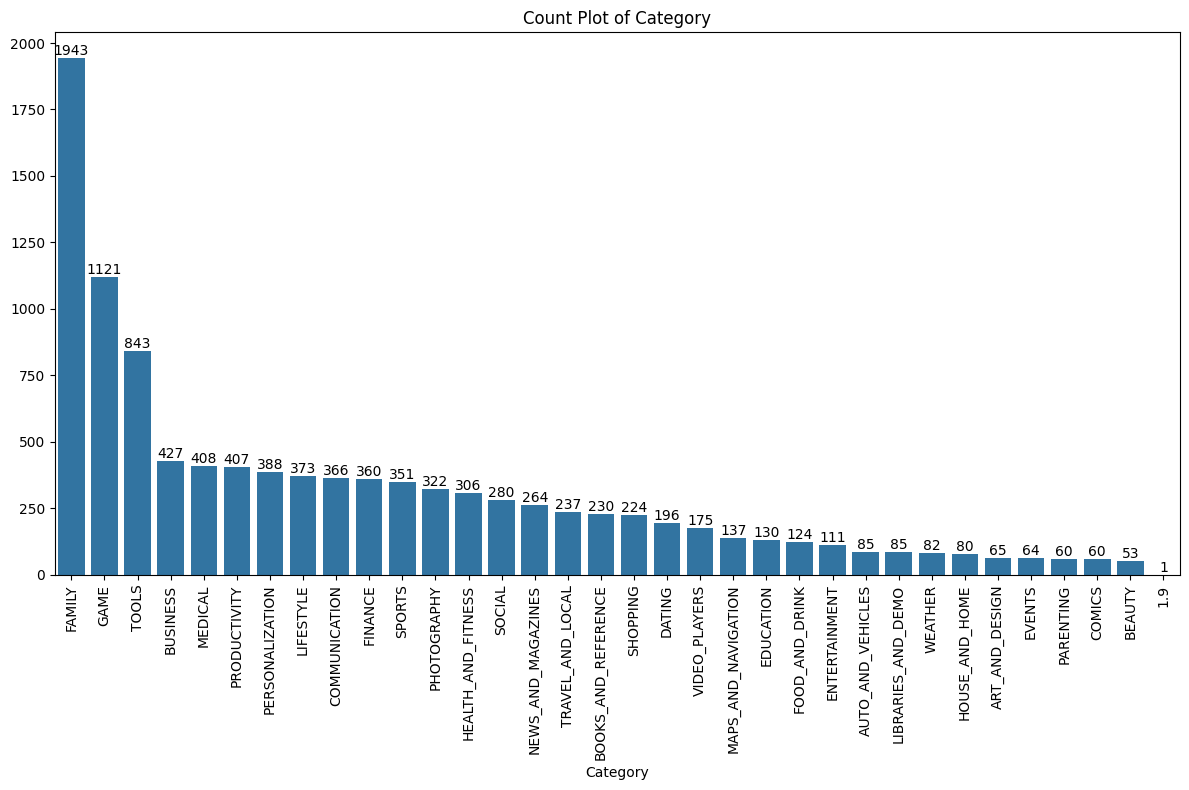

In [19]:
CountPiePlot(df,'Category',1)

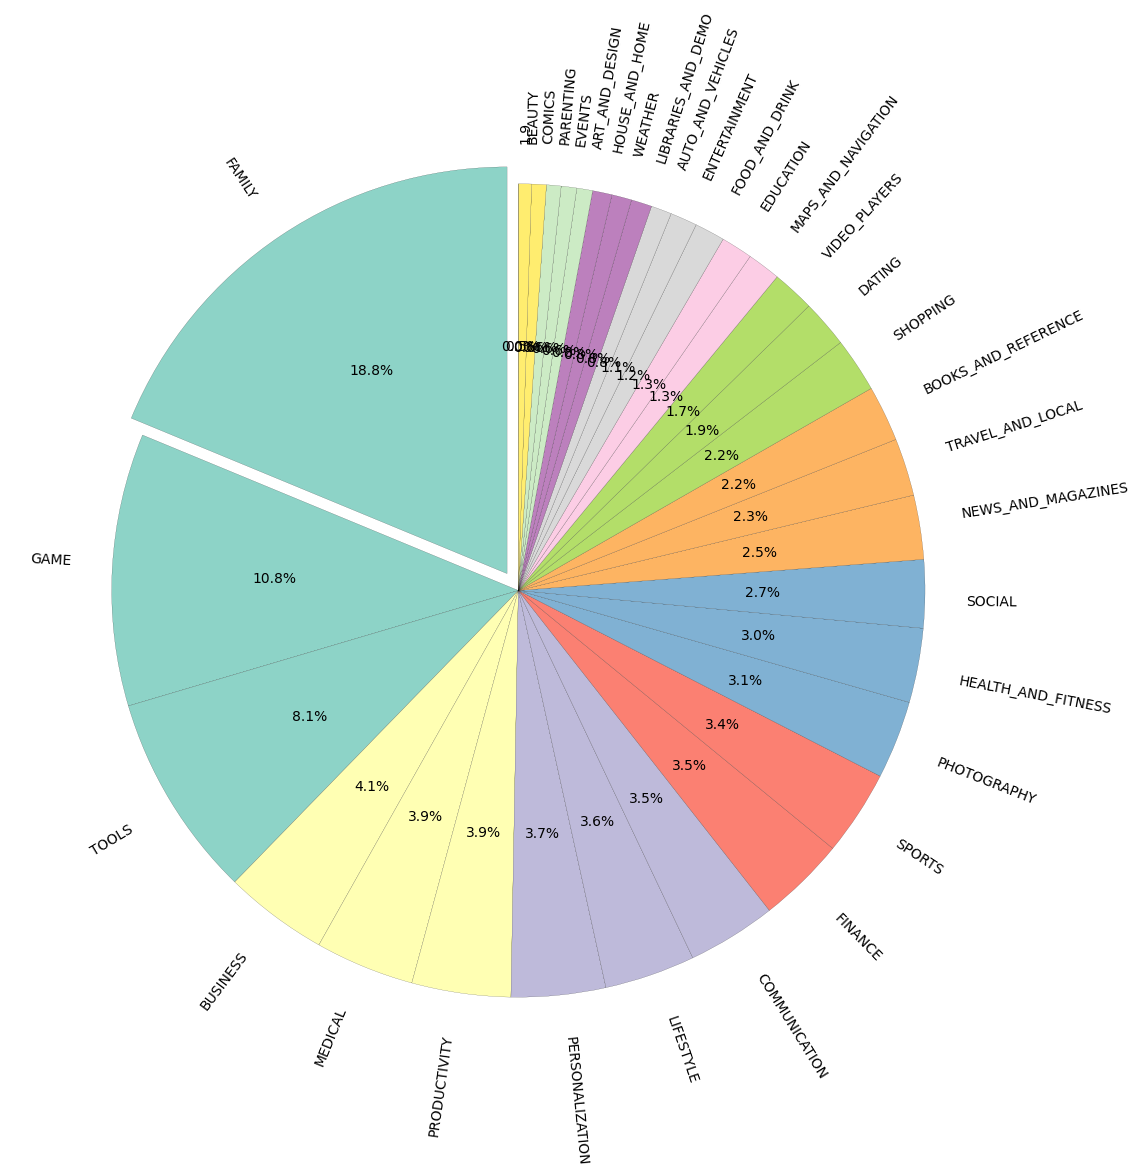

In [20]:
CountPiePlot(df, 'Category', 2)

we can conclude the bout 18% of the apps are in the **family category** then 10.8% are **games**

and also we can see that there is one record that hold a **1.9 category** so let's drop it 

In [21]:
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [22]:
error_index = df[df['Category'] == '1.9'].index
error_index

Index([9990], dtype='int64')

In [23]:
df = df.drop(error_index)
df[df['Category'] == '1.9'].index

Index([], dtype='int64')

In [24]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### **Rating Column**

In [25]:
print(df['Rating'].nunique())
print(df['Rating'].unique())


40
[4.1        3.9        4.7        4.5        4.3        4.4
 3.8        4.2        4.6        3.2        4.         4.19333832
 4.8        4.9        3.6        3.7        3.3        3.4
 3.5        3.1        5.         2.6        3.         1.9
 2.5        2.8        2.7        1.         2.9        2.3
 2.2        1.7        2.         1.8        2.4        1.6
 2.1        1.4        1.5        1.2       ]


In [26]:
df['Rating'].dtype

dtype('float64')

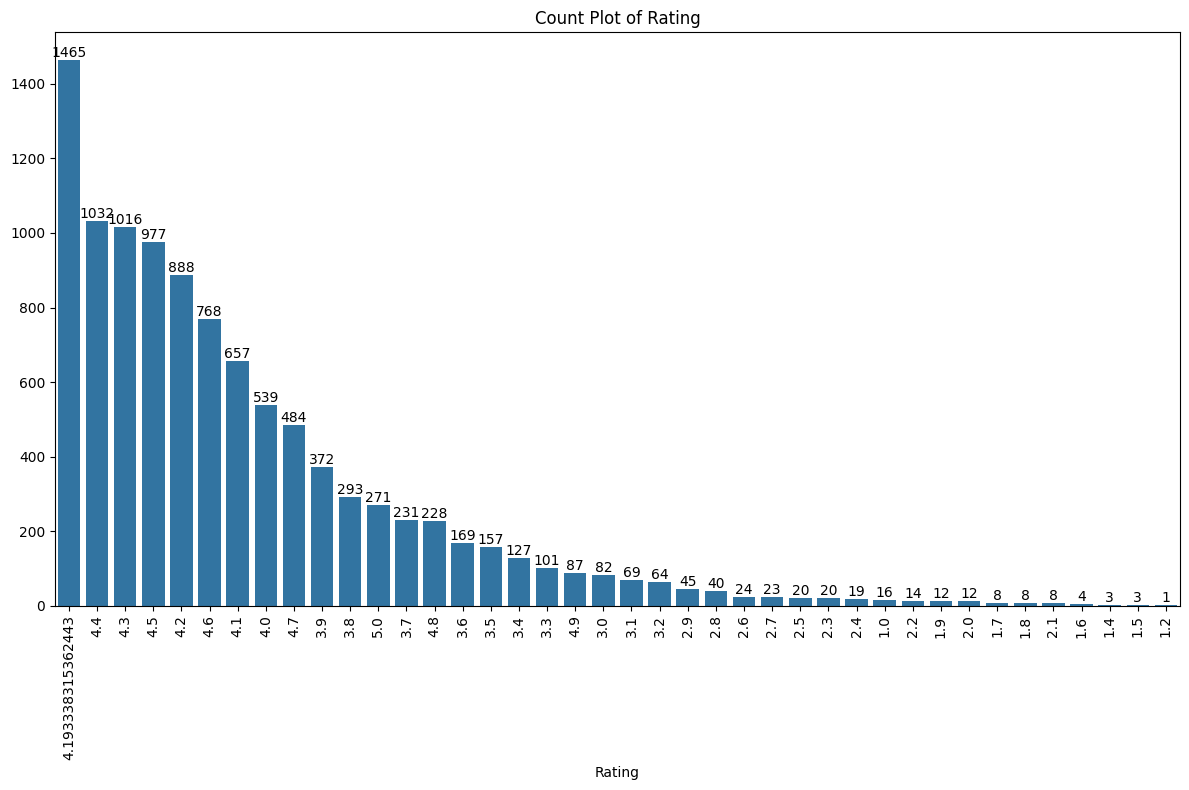

In [27]:
CountPiePlot(df,'Rating', 1)

the most user rates is **4.19**

#### **Reviews Column**

In [28]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [29]:
print(df['Reviews'].nunique())

6001


so the fist think that we need to do is to convert it into numerical data type

In [30]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [31]:
df['Reviews'] = df['Reviews'].astype(int)

In [32]:
print(f"Min: {df['Reviews'].min()}")
print(f"Max: {df['Reviews'].max()}")


Min: 0
Max: 78158306


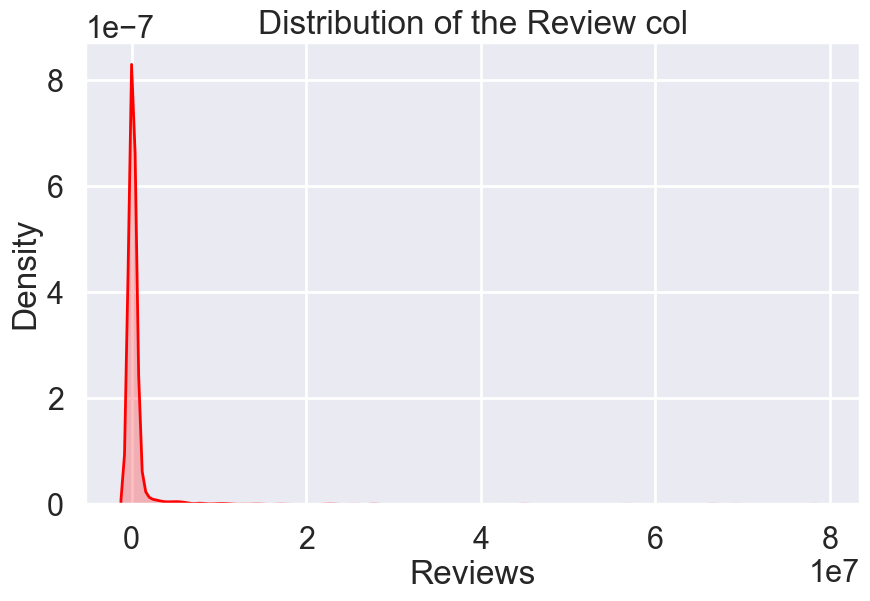

In [97]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['Reviews'], color='r',fill=True)
plt.title("Distribution of the Review col")
plt.show()

#### **Size Column**

In [34]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [35]:
df['Size'].nunique()

461

let's convert the whole column into K unit ==> 19M == 19000K

In [36]:
df['Size'] = df['Size'].str.replace('M','000')
df['Size'] = df['Size'].str.replace('k','')
df['Size']=df['Size'].replace('Varies with device',np.nan)
df['Size']=df['Size'].astype(float)

In [37]:
df['Size'].isnull().sum()

1526

In [38]:
df['Size'].head()

0    19000.0
1    14000.0
2        8.7
3    25000.0
4        2.8
Name: Size, dtype: float64

In [39]:
df['Size'].min()

1.0

In [40]:
df['Size'].max()

100000.0

In [41]:
df['Size'].mean()

19322.130517495185

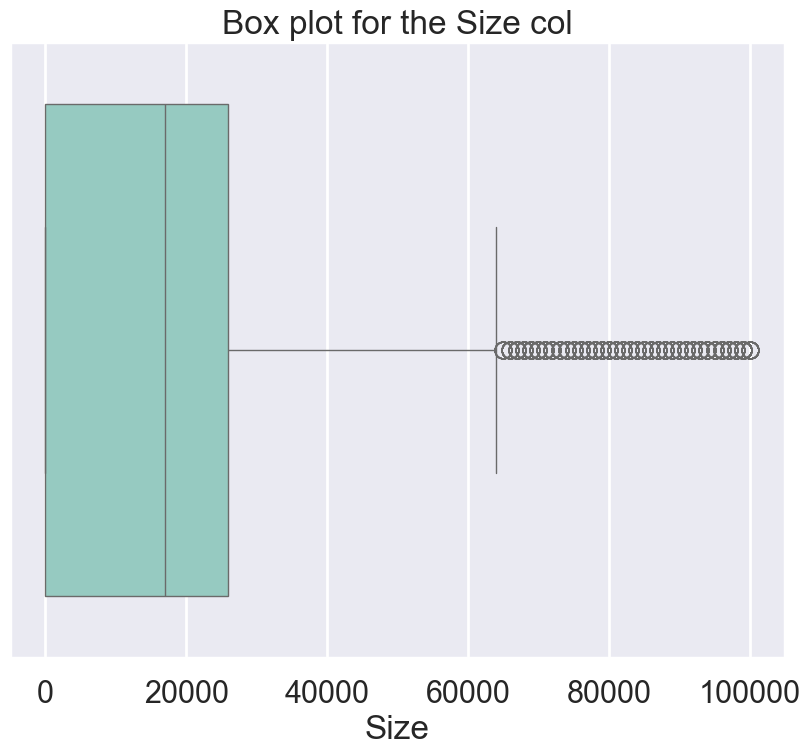

In [100]:
plt.figure(figsize=(10,8))
plt.title("Box plot for the Size col")
sns.boxplot(data=df,
            x='Size', palette='Set3')
plt.show()

In [43]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### **Installs Col**

In [44]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [45]:
df['Installs'].nunique()

21

here we will mapping this categories in an order 

In [46]:
mapping= {
    '0': 0,
    '0+': 1,
    '1+': 2,
    '5+': 3,
    '10+': 4,
    '50+': 5,
    '100+': 6,
    '500+': 7,
    '1,000+': 8, 
    '5,000+': 9,
    '10,000+': 10,
    '50,000+': 11,
    '100,000+': 12,
    '500,000+': 13,
    '1,000,000+': 14,
    '5,000,000+': 15,
    '10,000,000+': 16,
    '50,000,000+': 17,
    '100,000,000+': 18,
    '500,000,000+': 19,
    '1,000,000,000+': 20,
}


df['Installs'] = df['Installs'].replace(mapping)

In [47]:
df['Installs'] = df['Installs'].astype(int)

In [48]:
df['Installs'].head()

0    10
1    13
2    15
3    17
4    12
Name: Installs, dtype: int32

In [49]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,13,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,15,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,17,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,12,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### **Type col**

In [50]:
df['Type'].nunique()

2

In [51]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

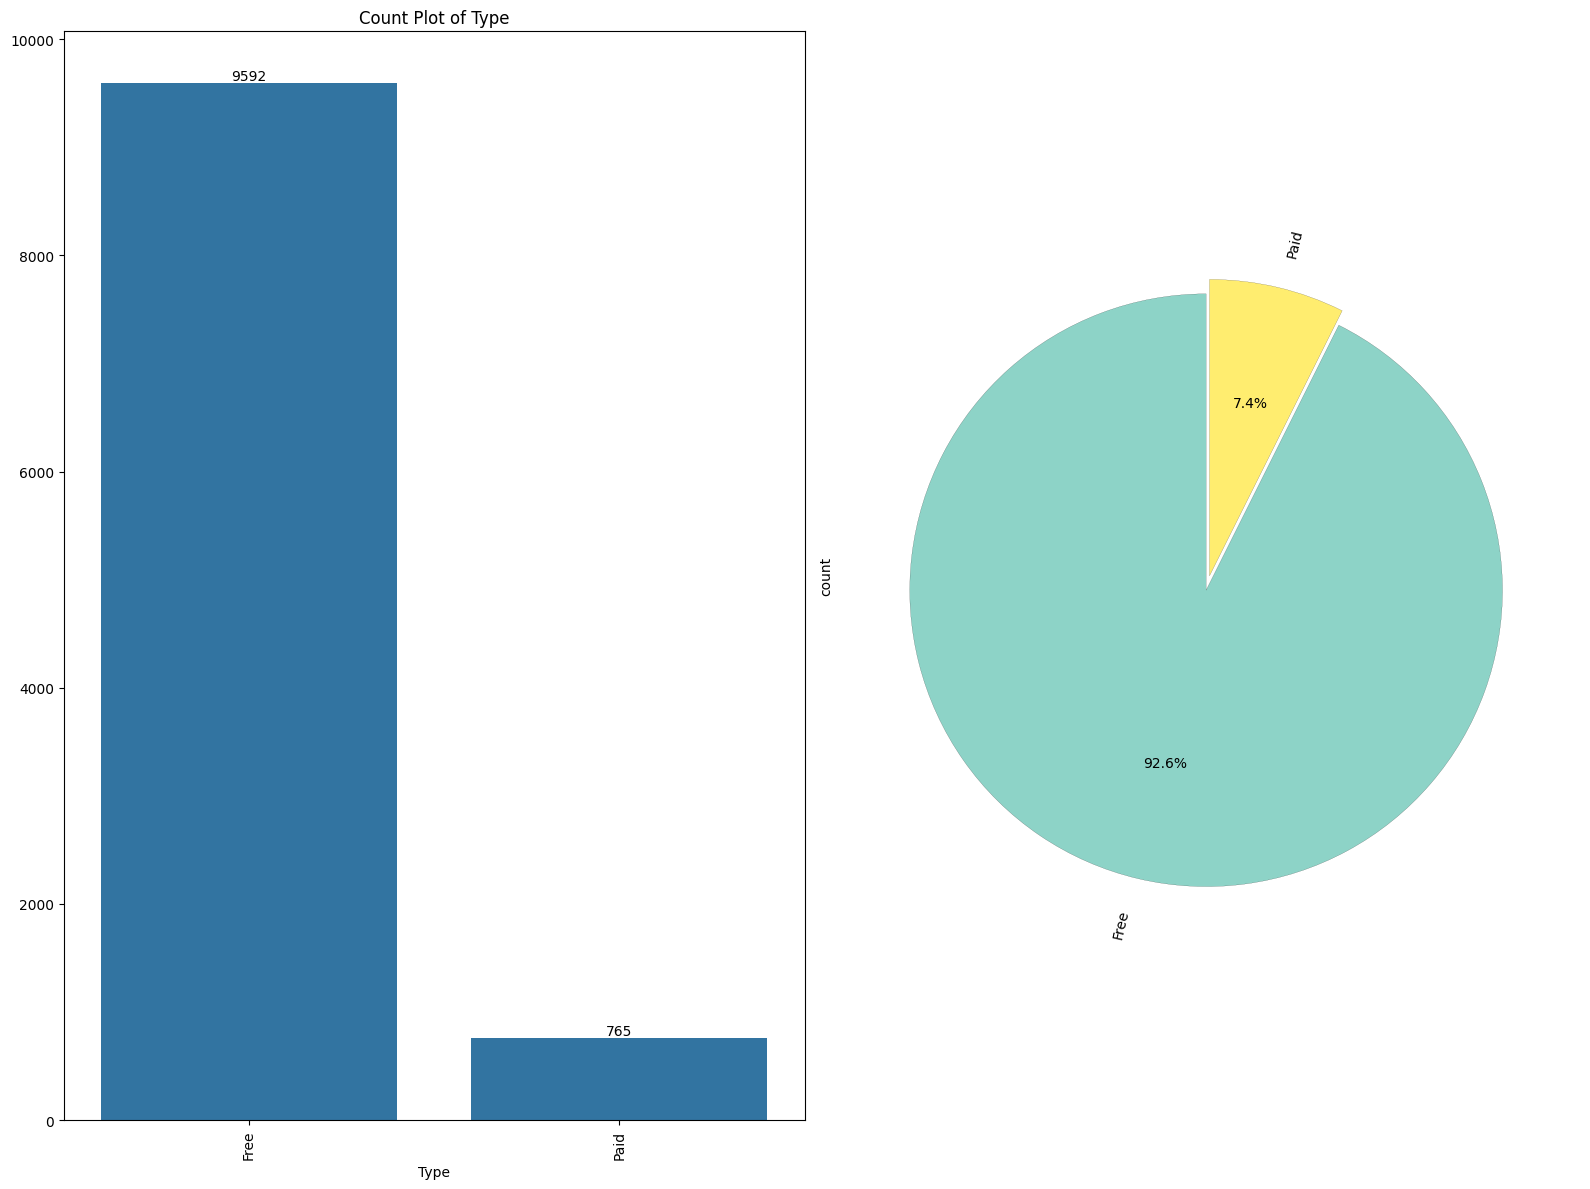

In [52]:
CountPiePlot(df,'Type',3)

In [53]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,13,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


#### ***Price col***

In [54]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [55]:
df['Price'].nunique()

92

In [56]:
df['Price']= df['Price'].str.replace('$','')

In [57]:
df['Price'] = df['Price'].astype(float)

#### **Content Rating**

In [58]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

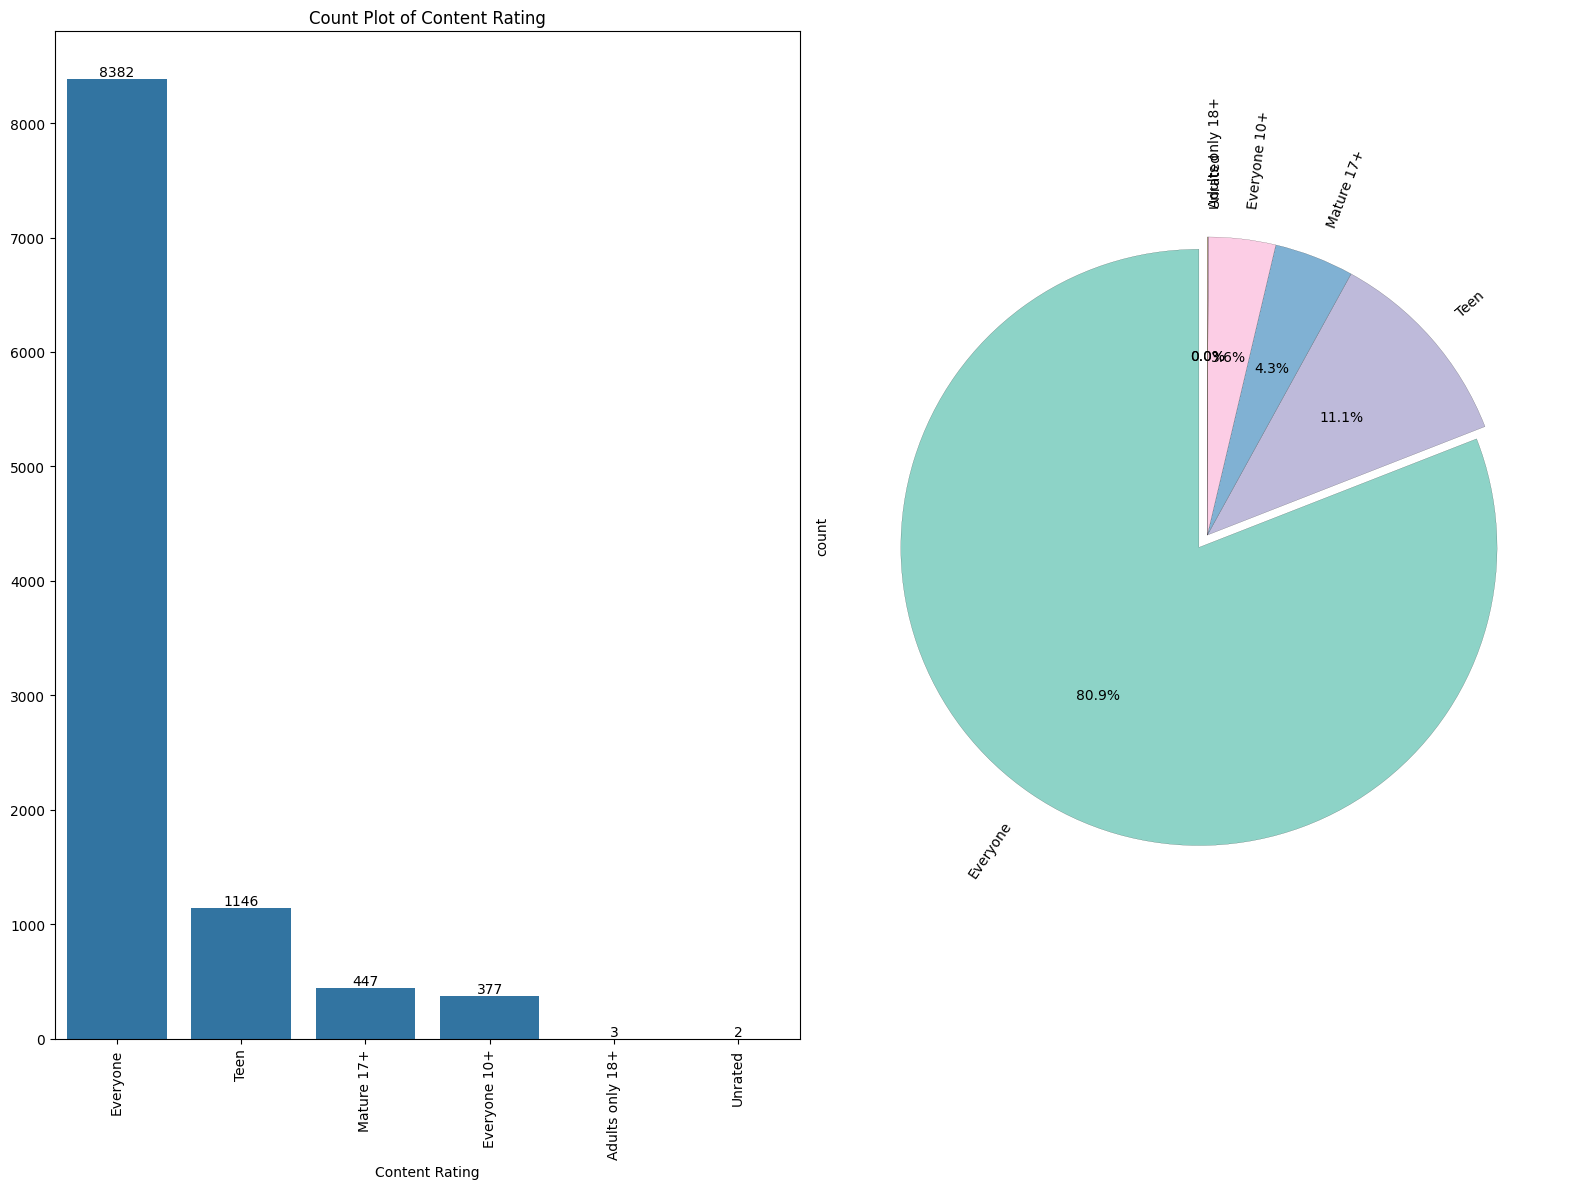

In [59]:
CountPiePlot(df, "Content Rating",3)

We can use one hot encoding to encode this categorical values

#### **Genres col**

In [60]:
df['Genres'].nunique()

119

we can use label encoding to encode them

#### **Last Update**

In [61]:
df['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [62]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [63]:
df['Day Updated'] = df['Last Updated'].dt.day
df['Month Updated'] = df['Last Updated'].dt.month
df['Year Updated'] = df['Last Updated'].dt.year

In [64]:
df = df.drop(columns=['Last Updated'],axis=1)

#### **Current Version Col**

In [65]:
df['Current Ver'].nunique()

2831

In [66]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

we ca do a label encoding

In [67]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day Updated,Month Updated,Year Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,13,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,15,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,17,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,12,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


#### **Android Ver col**

In [68]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [69]:
df['Android Ver'].nunique()

33

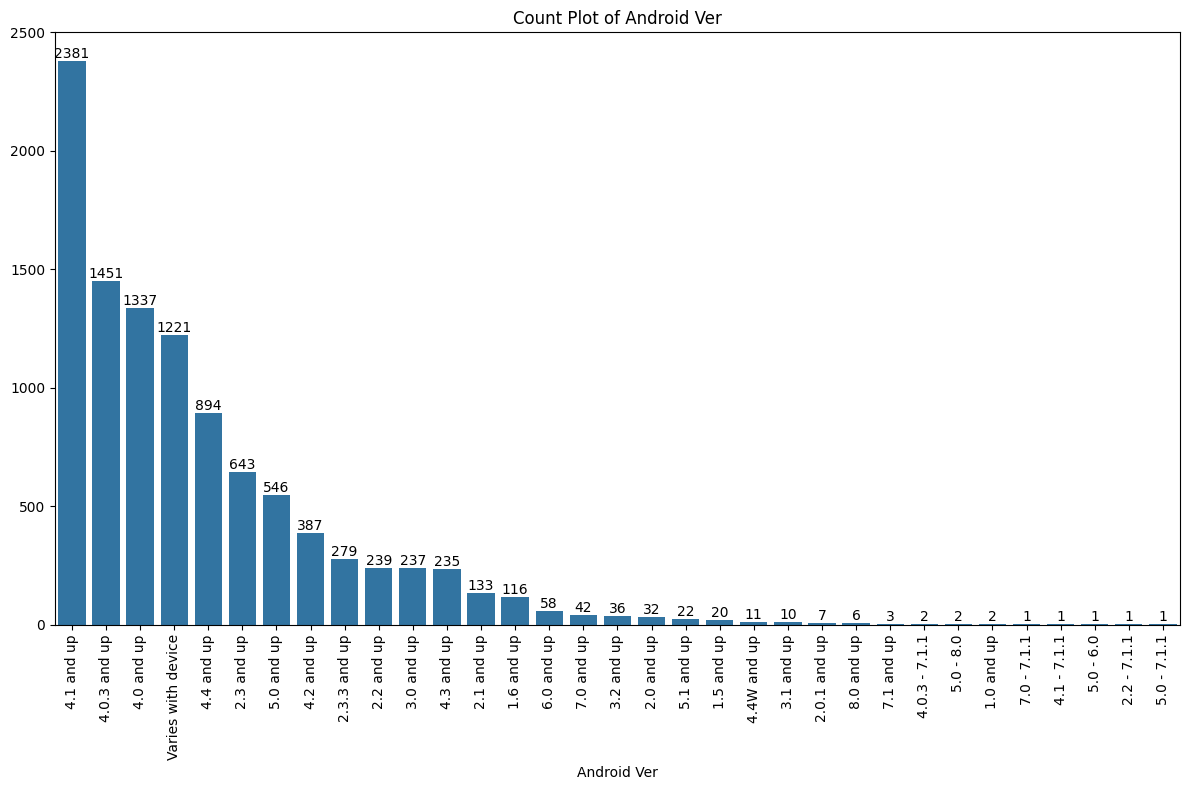

In [70]:
CountPiePlot(df, 'Android Ver', 1)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int32  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int32  
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Current Ver     10357 non-null  object 
 11  Android Ver     10357 non-null  object 
 12  Day Updated     10357 non-null  int32  
 13  Month Updated   10357 non-null  int32  
 14  Year Updated    10357 non-null  int32  
dtypes: float64(3), int32(5), object(7)
memory usage: 1.1+ MB


In [72]:
df.to_csv('google_cleaned.csv')

## EDA


In [73]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day Updated,Month Updated,Year Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,13,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,15,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,17,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,12,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [74]:
df.duplicated().sum()

0

In [75]:
df = df.drop_duplicates(keep='first')

In [76]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1526
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Current Ver          0
Android Ver          0
Day Updated          0
Month Updated        0
Year Updated         0
dtype: int64

In [77]:
df['Size'] = df['Size'].replace(np.nan, df['Size'].mean())

In [78]:
df.shape

(10357, 15)

## Explore Data

In [79]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day Updated', 'Month Updated', 'Year Updated']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

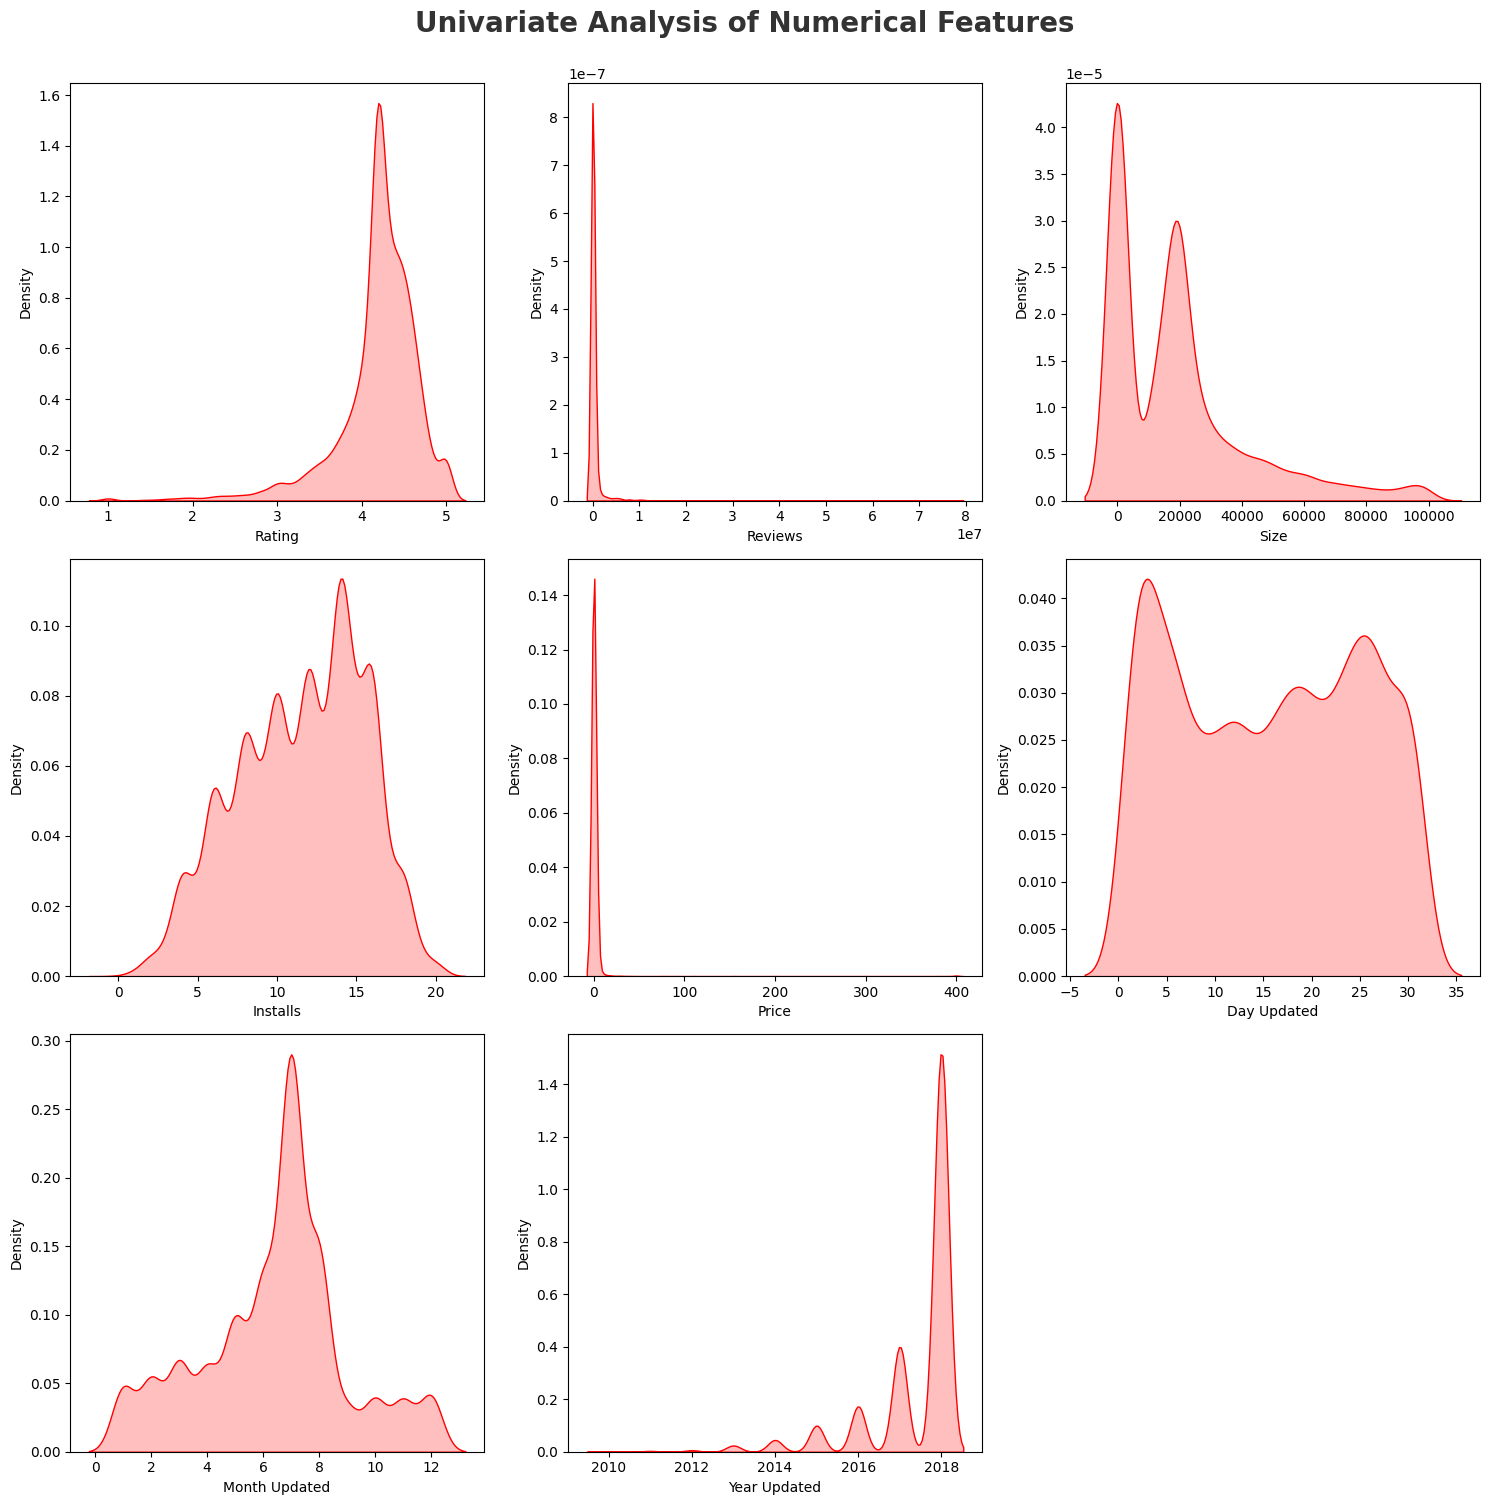

In [80]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
plt.show()

## Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

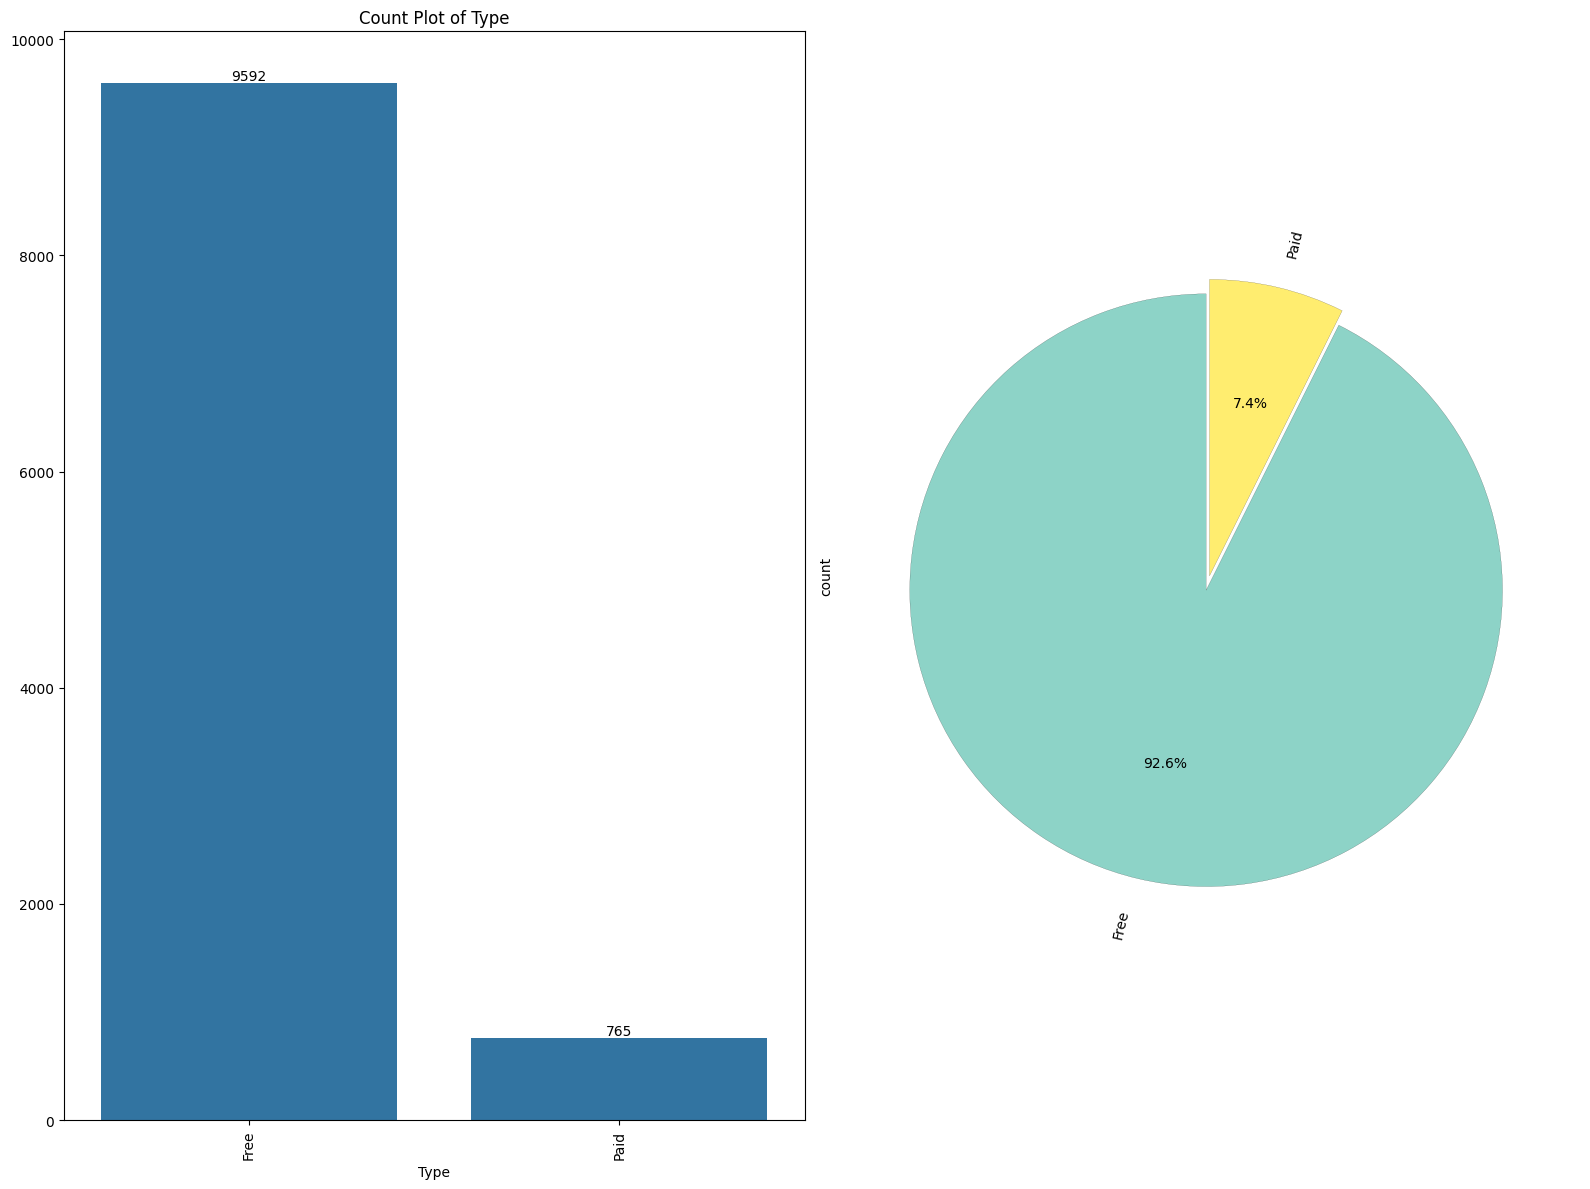

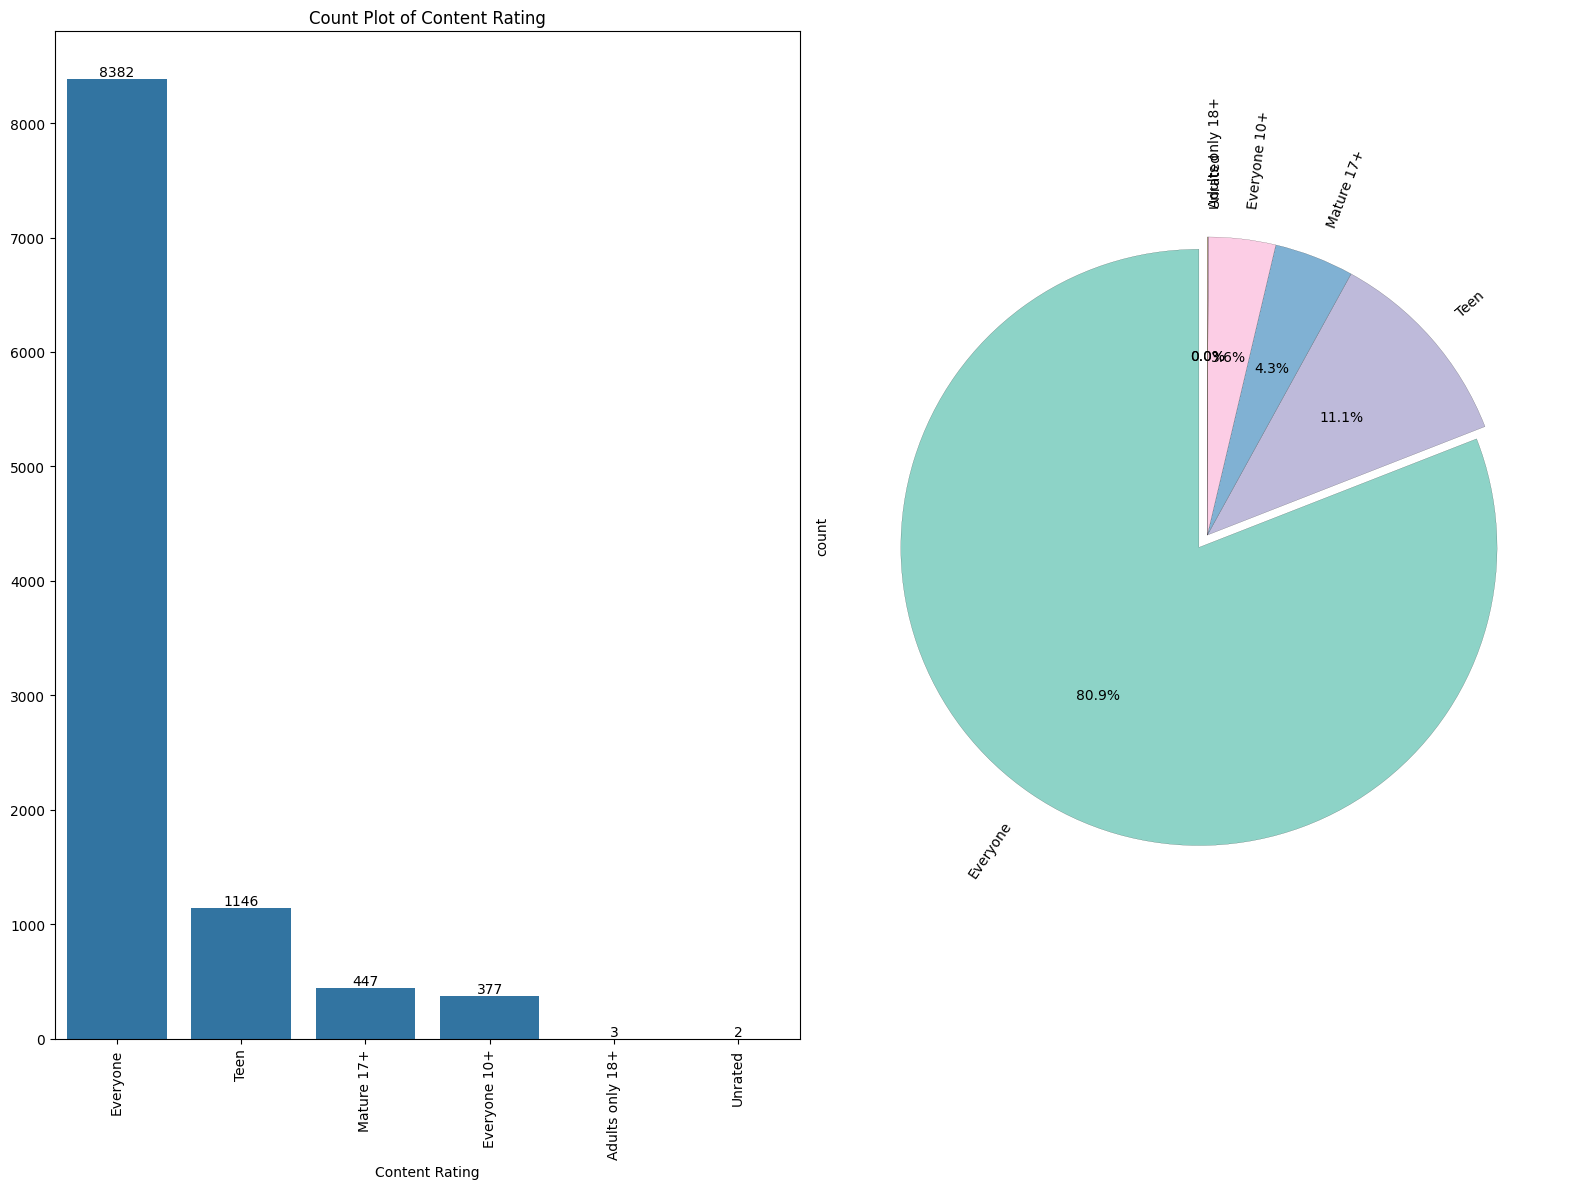

In [81]:
# categorical columns

category = [ 'Type', 'Content Rating']

for col in category:
    CountPiePlot(df,col,3)

In [82]:
## Top 10 App Categories
category = pd.DataFrame(df['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [83]:
category

,count
Category,
FAMILY,1943
GAME,1121
TOOLS,843
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,388
LIFESTYLE,373
COMMUNICATION,366


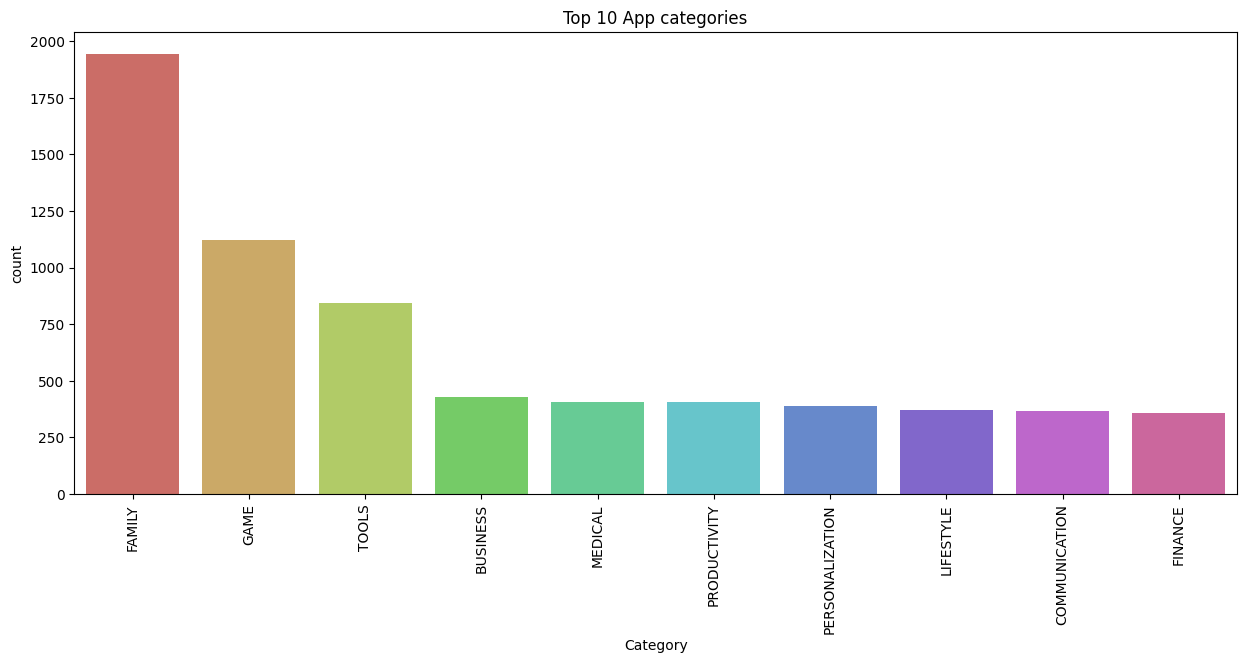

In [84]:
## top 10 app
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## What are the Top 5 most installed Apps in Each popular Categories ??

In [101]:
dfa

,Category,App,Installs
4517,GAME,Helix Jump,108
4047,GAME,8 Ball Pool,108
4852,GAME,Subway Surfers,100
4979,GAME,Zombie Catchers,96
4881,GAME,Temple Run 2,95
...,...,...,...
6551,NEWS_AND_MAGAZINES,Sweden Newspapers,1
547,BUSINESS,CX Network,1
3740,FINANCE,Eu sou Rico,1
5658,LIFESTYLE,I'm Rich/Eu sou Rico/أنا غني/我很有錢,1


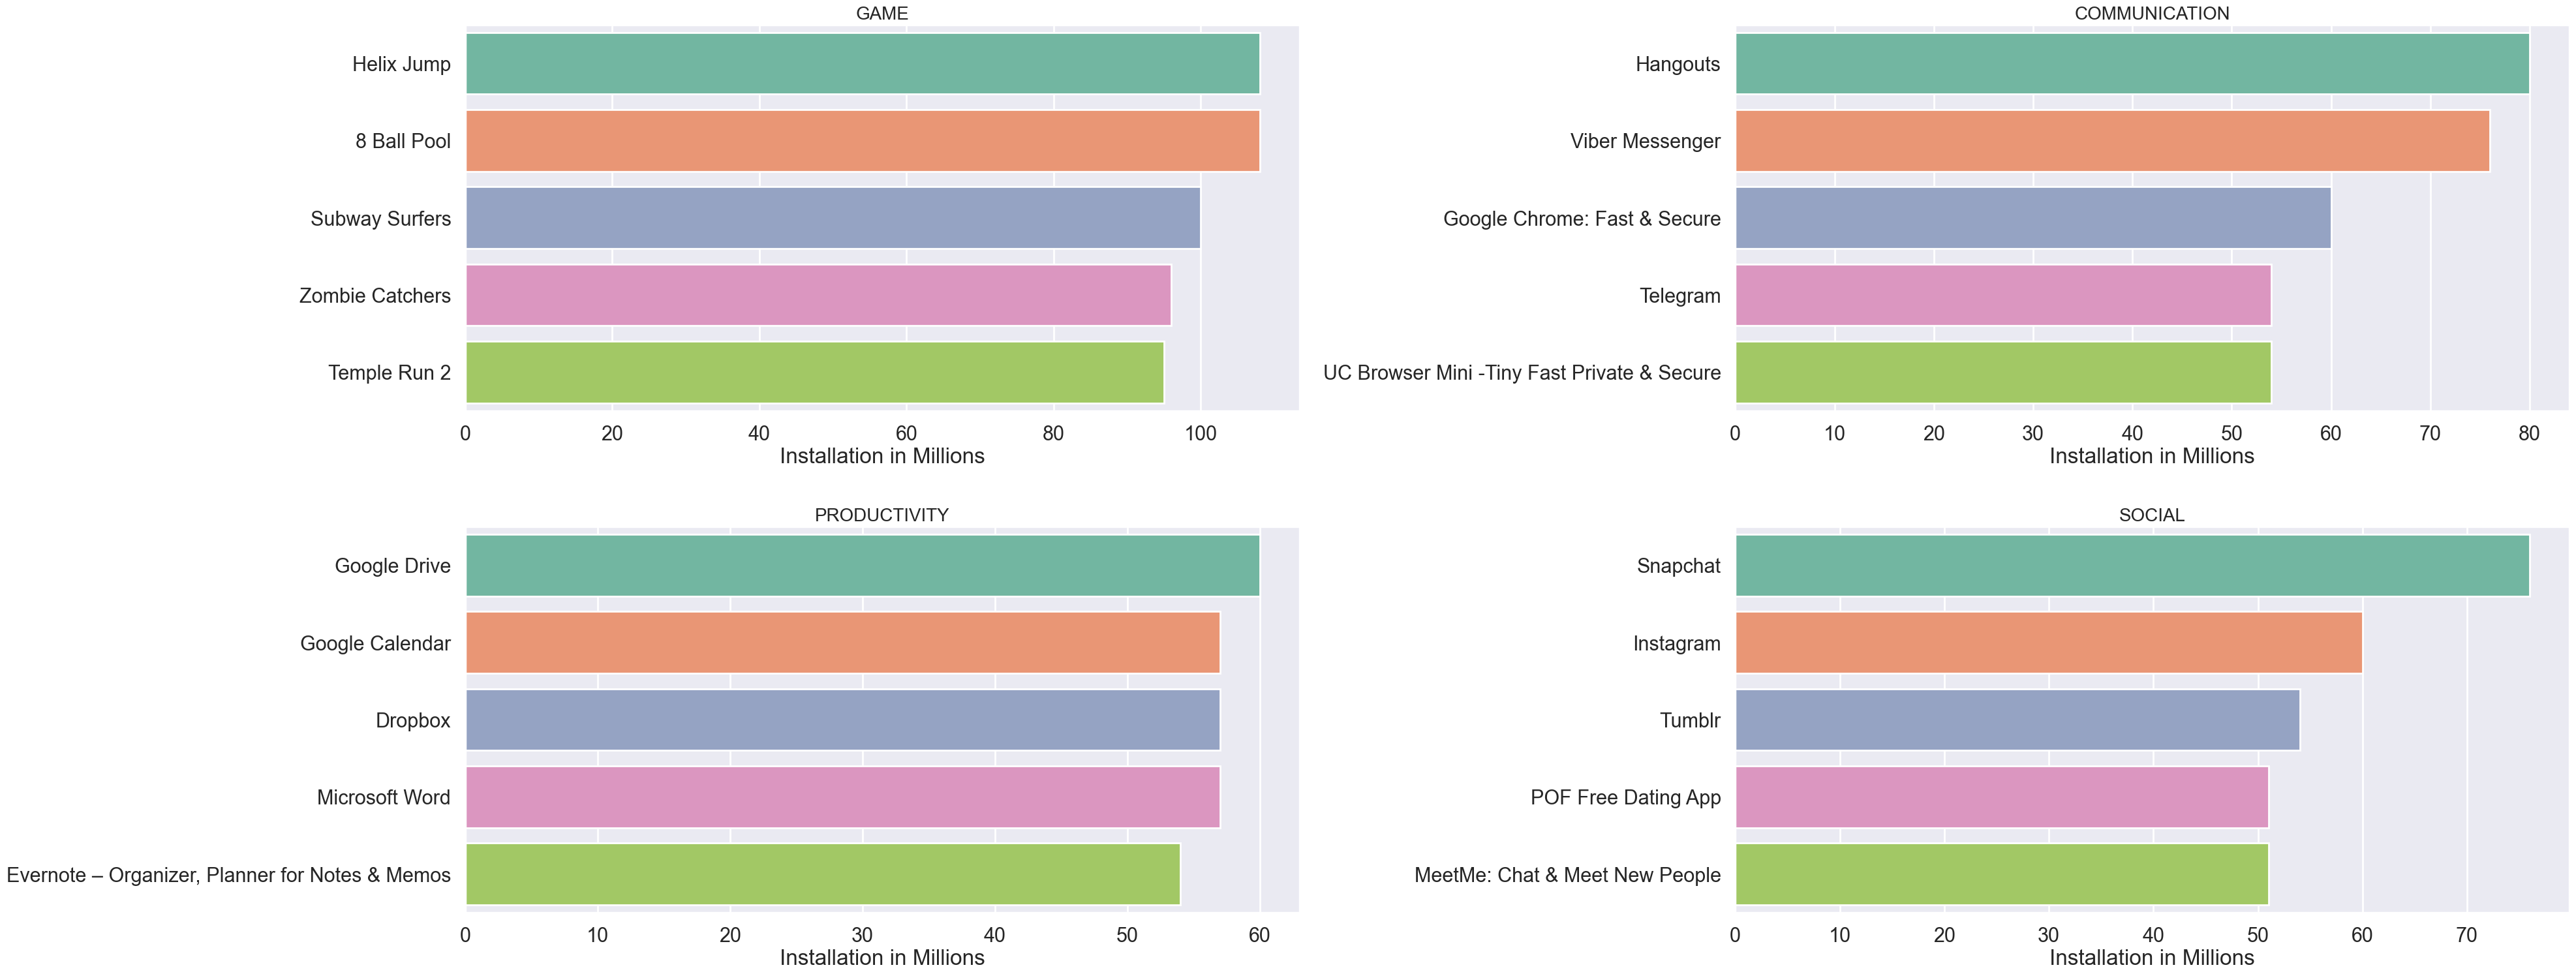

In [85]:
dfa = df.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' , palette='Set2')
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

## How many apps are there on Google Play Store which get 5 ratings??

In [86]:
rating = df.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.head(1)

Number of 5 rated apps 271


,Category,Installs,App,Rating
461,FAMILY,7,CD CHOICE TUBE,5.0


## Result
- There are 271 five rated apps on Google Play store
- Top most is 'CT Brain Interpretation' from 'Family' Category